In [52]:
import openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataset = openml.datasets.get_dataset(31)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute, dataset_format="dataframe"
)

y = LabelEncoder().fit_transform(y)

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
166,<0,18,existing paid,furniture/equipment,1131.0,<100,unemployed,4,female div/dep/mar,none,2,car,33,none,own,1,skilled,1,none,yes
736,0<=X<200,24,existing paid,used car,11560.0,<100,1<=X<4,1,female div/dep/mar,none,4,car,23,none,rent,2,high qualif/self emp/mgmt,1,none,yes
584,no checking,12,existing paid,new car,2133.0,no known savings,>=7,4,female div/dep/mar,none,4,no known property,52,none,for free,1,high qualif/self emp/mgmt,1,yes,yes
240,<0,24,existing paid,new car,915.0,no known savings,>=7,4,female div/dep/mar,none,2,car,29,bank,own,1,skilled,1,none,yes
192,0<=X<200,27,existing paid,business,3915.0,<100,1<=X<4,4,male single,none,2,car,36,none,own,1,skilled,2,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,<0,24,critical/other existing credit,used car,2957.0,<100,>=7,4,male single,none,4,life insurance,63,none,own,2,skilled,1,yes,yes
482,<0,30,existing paid,furniture/equipment,3622.0,>=1000,>=7,4,female div/dep/mar,none,4,life insurance,57,none,rent,2,skilled,1,yes,yes
493,0<=X<200,6,existing paid,radio/tv,368.0,no known savings,>=7,4,male single,none,4,life insurance,38,none,own,1,skilled,1,none,yes
64,no checking,24,existing paid,radio/tv,3181.0,<100,<1,4,female div/dep/mar,none,4,life insurance,26,none,own,1,skilled,1,yes,yes


In [54]:
y_train # labelencoded

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

def lymph_pipeline(X, clf):
  cat_cols = X.select_dtypes(include=["category"]).columns.tolist()
  cat_pipe = make_pipeline(OneHotEncoder(handle_unknown='ignore'), SimpleImputer(strategy="most_frequent"))
  num_pipe = make_pipeline(SimpleImputer(strategy="mean"))
  ct = make_column_transformer((cat_pipe, cat_cols), remainder=num_pipe)
  return make_pipeline(ct, clf)

In [138]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold

clfs = [
  ("LinearSVC", LinearSVC(C=0.6)), 
  ("LogisticRegression", LogisticRegression(C=0.6, penalty="l2")), 
  ("SGDClassifier", SGDClassifier(alpha=0.1))]

for clf_name, clf in clfs:
  lp = lymph_pipeline(X, clf)
  cv = cross_validate(lp, X_train, y_train, cv=5, return_train_score=True)
  print(clf_name)
  print(f"Training Score: {cv['train_score']}")
  print(f"Test Score: {cv['test_score']}")
  print(f"Avg. Test Score: {sum(cv['test_score']) / len(cv['test_score'])}\n")

/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

LinearSVC
Training Score: [0.7125    0.7       0.65      0.690625  0.5171875]
Test Score: [0.68125 0.69375 0.725   0.6875  0.58125]
Avg. Test Score: 0.6737500000000001



/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression
Training Score: [0.771875  0.7890625 0.7765625 0.7875    0.7671875]
Test Score: [0.775   0.70625 0.80625 0.7125  0.79375]
Avg. Test Score: 0.75875

SGDClassifier
Training Score: [0.6890625 0.6890625 0.6890625 0.3203125 0.31875  ]
Test Score: [0.6875  0.6875  0.6875  0.31875 0.325  ]
Avg. Test Score: 0.54125



In [143]:
lp = lymph_pipeline(X_train, LogisticRegression(C=0.9))
lp.fit(X_train, y_train)
test_score = lp.score(X_test, y_test)
print(test_score)

0.75


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
conf = lp.decision_function(X_test)
norm_conf = (conf - conf.min()) / (conf.max() - conf.min())

In [188]:
# Calculate AUR
norm_conf = (conf - conf.min()) / (conf.max() - conf.min())
bounds = [x/10 for x in range(11)]
tprs = []
fprs = []
for b in bounds:
  y_pred = [1 if conf_r >= b else 0 for conf_r in norm_conf]
  tp, fp, tn, fn = 0, 0, 0, 0
  for p, a in zip(y_pred, y_test):
    if p + a == 2:
      tp += 1
    elif p > a:
      fp += 1
    elif p < a:
      fn += 1
    else:
      tn += 1
  assert(tp + fp + fn + tn == len(y_test))
  tpr = tp / (tp + fn)
  fpr = fp / (fp + tn)
  tprs.append(tpr)
  fprs.append(fpr)

tprs = sorted(tprs)
fprs = sorted(fprs)

print(fprs)
print(tprs)

[0.0, 0.0, 0.0, 0.0196078431372549, 0.0392156862745098, 0.17647058823529413, 0.27450980392156865, 0.39215686274509803, 0.7058823529411765, 0.803921568627451, 1.0]
[0.006711409395973154, 0.040268456375838924, 0.0738255033557047, 0.18791946308724833, 0.35570469798657717, 0.47651006711409394, 0.6845637583892618, 0.785234899328859, 0.912751677852349, 0.9798657718120806, 1.0]


In [203]:
# Maximize the TPR, therefore optimize on TPR
# Assume that false positives are twice as bad

opt_scores = []
for fpr, tpr in zip(fprs, tprs):
  opt_scores.append(tpr - 2 * fpr)
  
best_threshold = bounds[opt_scores.index(max(opt_scores))]
print("Best Threshold:", best_threshold)

Best Threshold: 0.4


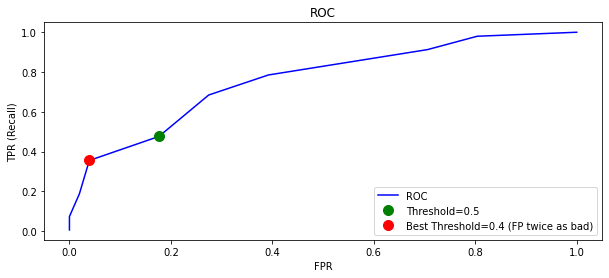

Area under the curve (AUR): 0.7616133701802869


In [205]:
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

db_0_5 = bounds.index(0.5)
plt.figure(figsize=(10,4))
plt.plot(fprs, tprs, "b-", label="ROC")
plt.plot(fprs[db_0_5], tprs[db_0_5], "go", markersize=10, label="Threshold=0.5")
plt.plot(fprs[bounds.index(best_threshold)], tprs[bounds.index(best_threshold)], "ro", markersize=10, label=f"Best Threshold={best_threshold} (FP twice as bad)")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("ROC")
plt.legend()
plt.show()
print("Area under the curve (AUR):", abs(cumtrapz(x=fprs, y=tprs)[-1]))